In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nfdrs4_moisture import compute_nfdrs4
from model_base import DeadFuelMoistureModel
from model_comparison import fetch_meteo_data, prepare_lagged_features_dead, predict_dfmc_fireinsite, compute_simple_nelson

In [2]:
lat = 35.27618889
lon = -112.0632472
start_date = "2018-05-23"
end_date = "2018-06-03"
dfr = fetch_meteo_data(lat, lon, start_date, end_date)
ffeats = prepare_lagged_features_dead(dfr.copy())
ffeats = predict_dfmc_fireinsite(ffeats)
dfr['simple_fmc'] = compute_simple_nelson(dfr)
nfd = compute_nfdrs4(dfr)
#dfr.merge

{'latitude': 35.27618889, 'longitude': -112.0632472, 'start_date': '2018-05-23', 'end_date': '2018-06-03', 'hourly': ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit', 'shortwave_radiation', 'global_tilted_irradiance'], 'tilt': 0.0, 'azimuth': 0.0}


In [36]:
def gen_data_for_site(lat, lon, start_date, end_date):
    dfr = fetch_meteo_data(lat, lon, start_date, end_date)
    ffeats = prepare_lagged_features_dead(dfr.copy())
    ffeats = predict_dfmc_fireinsite(ffeats)
    dfr['simple_fmc'] = compute_simple_nelson(dfr)
    nfd = compute_nfdrs4(dfr)
    nfd_fmc_cols = [x for x in nfd.columns if x.startswith("dmc_")]
    nfd_fmc_cols += ['lmc_herb', 'lmc_woody']
    nfd.loc[:, nfd_fmc_cols] *=100
    nfd_fmc_cols += ['date']
    fuel_columns = [x for x in ffeats.columns if x.startswith("dfmcfuel_")]
    fuel_columns+=['date']
    res = dfr.merge(ffeats[fuel_columns], on='date', how='left')
    res = res.merge(nfd[nfd_fmc_cols], on='date', how='left')
    return res

In [3]:
nfd_fmc_cols = [x for x in nfd.columns if x.startswith("dmc_")]
print(nfd_fmc_cols)
nfd_fmc_cols += ['lmc_herb', 'lmc_woody']
nfd.loc[:, nfd_fmc_cols] *=100
nfd_fmc_cols += ['date']
nfd[nfd_fmc_cols]

['dmc_1_hr', 'dmc_10_hr', 'dmc_100_hr', 'dmc_1000_hr']


,dmc_1_hr,dmc_10_hr,dmc_100_hr,dmc_1000_hr,lmc_herb,lmc_woody,date
0,14.743609,19.432929,19.999327,19.999998,30.0,60.0,2018-05-23 00:00:00+00:00
1,11.239701,18.032482,19.984159,19.999912,30.0,60.0,2018-05-23 01:00:00+00:00
2,9.438655,16.947991,19.942610,19.999468,30.0,60.0,2018-05-23 02:00:00+00:00
3,8.608097,16.183887,19.895047,19.998588,30.0,60.0,2018-05-23 03:00:00+00:00
4,8.501569,15.647742,19.852647,19.997486,30.0,60.0,2018-05-23 04:00:00+00:00
...,...,...,...,...,...,...,...
283,3.834396,6.129158,8.935985,13.242099,30.0,60.0,2018-06-03 19:00:00+00:00
284,3.312734,6.019747,8.896750,13.201379,30.0,60.0,2018-06-03 20:00:00+00:00
285,2.908448,5.873117,8.853233,13.155202,30.0,60.0,2018-06-03 21:00:00+00:00
286,2.606537,5.733043,8.808722,13.107588,30.0,60.0,2018-06-03 22:00:00+00:00


In [4]:
fuel_columns = [x for x in ffeats.columns if x.startswith("dfmcfuel_")]
fuel_columns+=['date']
fuel_columns

['dfmcfuel_Bracken leaves',
 'dfmcfuel_Bracken stem',
 'dfmcfuel_Gorse canopy',
 'dfmcfuel_Gorse stem',
 'dfmcfuel_Heather canopy',
 'dfmcfuel_Heather stem',
 'dfmcfuel_Moor grass',
 'dfmcfuel_Surface',
 'date']

In [5]:
res = dfr.merge(ffeats[fuel_columns], on='date', how='left')

In [6]:
res = res.merge(nfd[nfd_fmc_cols], on='date', how='left')

In [7]:
ffeats[fuel_columns]

,dfmcfuel_Bracken leaves,dfmcfuel_Bracken stem,dfmcfuel_Gorse canopy,dfmcfuel_Gorse stem,dfmcfuel_Heather canopy,dfmcfuel_Heather stem,dfmcfuel_Moor grass,dfmcfuel_Surface,date
0,12.640574,9.280599,9.280599,9.280599,10.327603,8.976282,12.365130,7.085261,2018-05-23 00:00:00+00:00
1,12.252647,8.892673,8.892673,8.892673,9.939677,8.588356,11.807478,6.750135,2018-05-23 01:00:00+00:00
2,12.222334,9.060414,9.060414,9.060414,10.107420,8.756098,12.144947,7.040977,2018-05-23 02:00:00+00:00
3,11.372511,8.210591,8.210591,8.210591,9.388990,7.910203,11.747130,6.596835,2018-05-23 03:00:00+00:00
4,8.620361,5.146168,5.146168,5.146168,5.839070,4.489589,8.835887,4.309566,2018-05-23 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...
283,3.368118,-0.046368,-0.046368,-0.046368,0.109026,-0.715092,2.998825,-1.545626,2018-06-03 19:00:00+00:00
284,3.350112,-0.267614,-0.267614,-0.267614,-0.112221,-1.023085,2.980819,-1.766872,2018-06-03 20:00:00+00:00
285,1.532034,-2.021185,-2.021185,-2.021185,-1.959827,-2.720869,1.360203,-2.781494,2018-06-03 21:00:00+00:00
286,1.367462,-2.101284,-2.101284,-2.101284,-2.039927,-2.800968,1.360203,-2.861593,2018-06-03 22:00:00+00:00


<Axes: xlabel='date', ylabel='dmc_1_hr'>

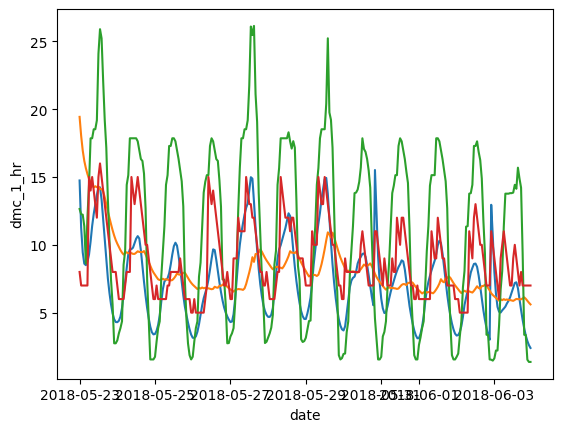

In [22]:
sns.lineplot(data=res, x='date', y='dmc_1_hr')
sns.lineplot(data=res, x='date', y='dmc_10_hr')
sns.lineplot(data=res, x='date', y='dfmcfuel_Bracken leaves')
#sns.lineplot(data=res, x='date', y='dfmcfuel_Heather stem')
sns.lineplot(data=res, x='date', y='simple_fmc')
#sns.lineplot(data=res, x='date', y='vapour_pressure_deficit')

In [25]:
model = DeadFuelMoistureModel(pickled_model_fname="model_onehot_dead.onnx")
dfr = model.prepare_training_dataset(
    fname="data/training_dataset_features_full.parquet"
)
site = "Cobham Common H15"
 

In [28]:
dfs = dfr[dfr.site==site].copy()

In [33]:
lon = dfs.longitude.iloc[0]
lat = dfs.latitude.iloc[0]

In [35]:
start_date = dfs.date.min().strftime("%Y-%m-%d")
end_date = dfs.date.max().strftime("%Y-%m-%d")

In [37]:
ress = gen_data_for_site(lat, lon, start_date, end_date)

{'latitude': np.float64(51.374153), 'longitude': np.float64(-0.59932), 'start_date': '2021-02-24', 'end_date': '2023-02-19', 'hourly': ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m', 'vapour_pressure_deficit', 'shortwave_radiation', 'global_tilted_irradiance'], 'tilt': 4.847192439431614, 'azimuth': 148.39249775375112}


<Axes: xlabel='date', ylabel='dmc_1_hr'>

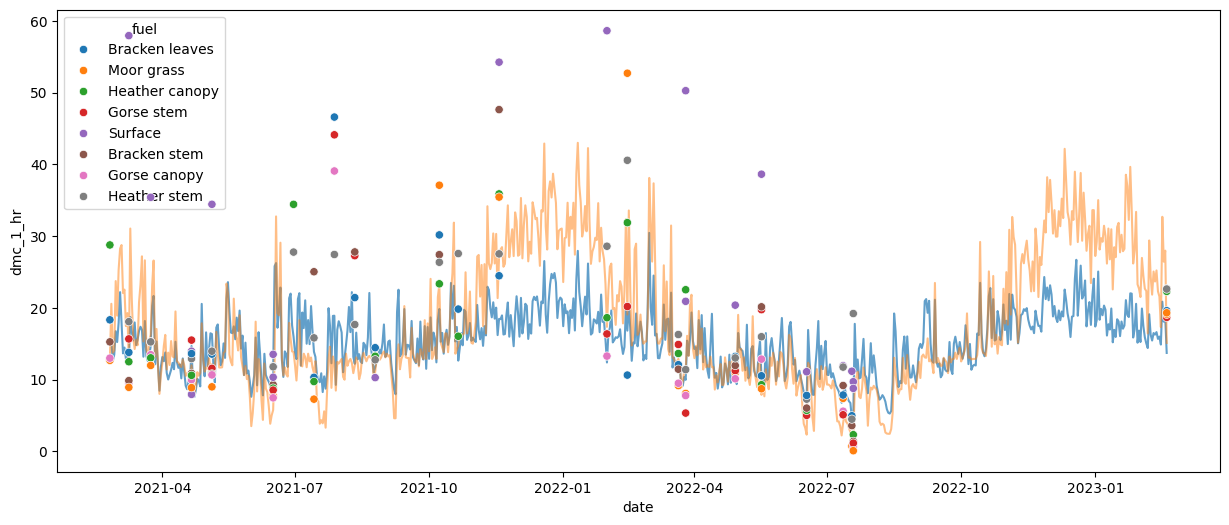

In [70]:
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111)
    ressd = ress.groupby(ress.date.dt.date)[['dmc_1_hr', 'dmc_10_hr', 'dfmcfuel_Bracken leaves', 'dfmcfuel_Heather canopy', 'simple_fmc']].min()
    sns.lineplot(data=ressd, x='date', y='dmc_1_hr', alpha=0.7, ax=ax)
    #sns.lineplot(data=ressd, x='date', y='dmc_10_hr',alpha=0.7, ax=ax)
    sns.lineplot(data=ressd, x='date', y='dfmcfuel_Bracken leaves',alpha=0.5, ax=ax)
    #sns.lineplot(data=ressd, x='date', y='dfmcfuel_Heather stem',ax=ax)
    #sns.lineplot(data=ressd, x='date', y='simple_fmc', alpha=0.5,ax=ax)
    sns.scatterplot(data=dfs, x=dfs.date.dt.date, y="fmc_%", hue="fuel", zorder=100)



In [45]:
ressd = ress.groupby(ress.date.dt.date)[['dmc_1_hr', 'dmc_10_hr', 'dfmcfuel_Bracken leaves', 'simple_fmc']].min()

,dmc_1_hr,dmc_10_hr,dfmcfuel_Bracken leaves,simple_fmc
date,,,,
2021-02-24,15.406842,15.740775,12.640574,13
2021-02-25,15.399029,16.866001,20.574322,13
2021-02-26,12.534445,15.177320,13.763504,14
2021-02-27,13.503435,14.812722,14.072591,16
2021-02-28,16.753947,17.474232,23.738514,14
...,...,...,...,...
2023-02-15,14.893268,16.419619,17.318924,14
2023-02-16,20.866365,22.679492,32.695156,19
2023-02-17,18.082883,21.879047,26.445852,14


In [49]:
dfs.date.dt.date

1255    2021-05-05
1257    2021-05-05
1260    2021-05-05
1261    2021-05-05
1262    2021-05-05
           ...    
5803    2023-02-19
5805    2023-02-19
5806    2023-02-19
5808    2023-02-19
5812    2023-02-19
Name: date, Length: 155, dtype: object

<Axes: >

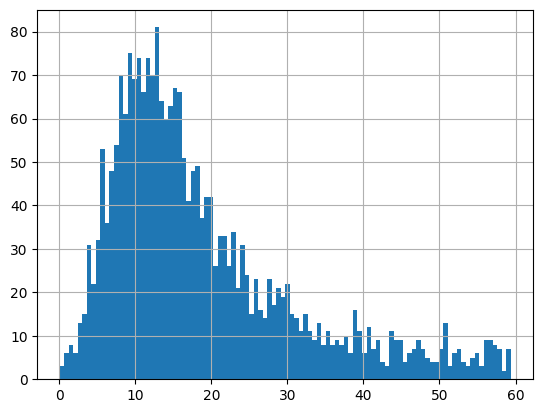

In [73]:
dfr['fmc_%'].hist(bins=100)

In [82]:
ress.groupby(ress.date.dt.date)['vapour_pressure_deficit'].max().nlargest(10)

date
2022-07-19    4.690043
2022-07-18    4.374482
2022-08-13    3.811979
2022-08-12    3.668088
2022-08-14    3.461979
2022-08-11    3.428323
2022-07-11    2.886275
2022-08-10    2.727462
2022-07-12    2.716344
2022-06-17    2.704217
Name: vapour_pressure_deficit, dtype: float32

In [84]:
dfr[dfr['fmc_%']<2]

,date,site,longitude,latitude,climate_region_of_uk,lcm_land_cover,elevation,slope,aspect,soil_type,...,fuel,fmc_cat,fuel_Bracken leaves,fuel_Bracken stem,fuel_Gorse canopy,fuel_Gorse stem,fuel_Heather canopy,fuel_Heather stem,fuel_Moor grass,fuel_Surface
1316,2021-10-08 13:00:00+00:00,Ockham Common F15,-0.452030,51.317308,South East,Coniferous Forest,37,1.129449,325.740037,15,...,Bracken leaves,dead,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3288,2022-08-09 10:00:00+00:00,Stanta AG10,0.760530,52.490625,East Anglia,Acid Grassland,39,0.656104,84.166693,10,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3469,2022-07-18 13:00:00+00:00,Stanta H3,0.755390,52.540589,East Anglia,Heathland,41,1.219763,169.714813,3,...,Gorse stem,dead,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3477,2022-07-18 13:00:00+00:00,Stanta H3,0.755390,52.540589,East Anglia,Heathland,41,1.219763,169.714813,3,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4039,2022-07-19 15:00:00+00:00,Matlock Moor F14,-1.923267,53.165069,Peak District,Coniferous Forest,371,6.437168,342.595688,14,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4184,2022-08-10 14:00:00+00:00,Ockham Common H15,-0.445240,51.315689,South East,Heathland,44,0.875319,294.770369,15,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4549,2022-07-18 16:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Moor grass,dead,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4559,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Gorse canopy,dead,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4567,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Bracken stem,dead,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4568,2022-07-19 10:00:00+00:00,Cobham Common H15,-0.599320,51.374153,South East,Heathland,55,1.639942,144.394817,15,...,Gorse stem,dead,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
